# Datos Faltantes

In [2]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.impute import SimpleImputer, KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargar el conjunto de datos
diabetes = load_diabetes(as_frame=True)
data = diabetes.data
data['target'] = diabetes.target

In [4]:
data.sample(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
200,0.056239,-0.044642,-0.057941,-0.007977,0.052093,0.049103,0.056003,-0.021412,-0.028323,0.044485,158.0
403,-0.020045,-0.044642,0.097264,-0.005670,-0.005697,-0.023861,-0.021311,-0.002592,0.061684,0.040343,275.0
10,-0.096328,-0.044642,-0.083808,0.008101,-0.103389,-0.090561,-0.013948,-0.076395,-0.062917,-0.034215,101.0
86,-0.070900,0.050680,-0.075186,-0.040099,-0.051103,-0.015092,-0.039719,-0.002592,-0.096435,-0.034215,55.0
213,0.001751,-0.044642,-0.070875,-0.022885,-0.001569,-0.001001,0.026550,-0.039493,-0.022517,0.007207,49.0
306,0.009016,0.050680,-0.001895,0.021872,-0.038720,-0.024800,-0.006584,-0.039493,-0.039809,-0.013504,44.0
89,-0.045472,-0.044642,-0.048241,-0.019442,-0.000193,-0.016032,0.067048,-0.039493,-0.024795,0.019633,111.0
203,-0.001882,0.050680,0.030440,0.052858,0.039710,0.056619,-0.039719,0.071210,0.025395,0.027917,222.0
166,-0.056370,0.050680,-0.060097,-0.036656,-0.088254,-0.070833,-0.013948,-0.039493,-0.078140,-0.104630,70.0
211,0.092564,-0.044642,0.036907,0.021872,-0.024960,-0.016658,0.000779,-0.039493,-0.022517,-0.021788,70.0


In [5]:
# Simular valores faltantes
np.random.seed(42)
data.loc[data.sample(frac=0.1).index, 'bmi'] = np.nan
data.loc[data.sample(frac=0.1).index, 'bp'] = np.nan

In [6]:
bmi_original = data["bmi"]
df_mean = data.copy()
df_knn = data.copy()

# Ejercicios
Contesta las siguientes preguntas. Para cada pregunta, deberás escribir código que demostrará cómo llegaste al resultado:

### 1. ¿Cuántos valores faltantes hay en cada columna?**

In [7]:
data.isnull().sum()

age        0
sex        0
bmi       44
bp        44
s1         0
s2         0
s3         0
s4         0
s5         0
s6         0
target     0
dtype: int64

### 2. Utiliza imputación simple (media) para llenar los valores faltantes de la columna 'bmi'.

In [8]:
imputer = SimpleImputer(strategy="mean")
df_mean[["bmi"]] = imputer.fit_transform(df_mean[["bmi"]])

In [9]:
df_mean.isnull().sum()

age        0
sex        0
bmi        0
bp        44
s1         0
s2         0
s3         0
s4         0
s5         0
s6         0
target     0
dtype: int64

### 3. Utiliza KNNImputer para imputar valores en las columnas 'bmi' y 'bp'. Compara los resultados con los de la imputación simple.

In [10]:
knn_imputer = KNNImputer(n_neighbors=2)
columnas = ["bmi","bp"]
df_knn[columnas] = knn_imputer.fit_transform(df_knn[columnas])


In [11]:
df_knn.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

### 4. Genera un histograma comparando los datos antes y después de la imputación en la columna 'bmi'.

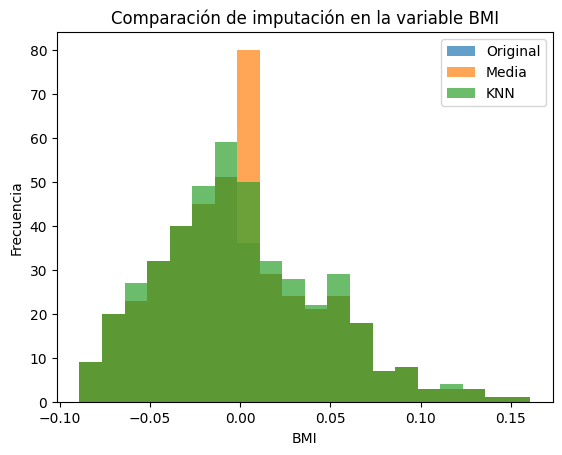

In [12]:
plt.figure()

#Histograma de la variable BMI original
plt.hist(bmi_original.dropna(), bins=20, alpha=0.7, label="Original")

#Histograma de la variable BMI después de la imputación por la media
plt.hist(df_mean["bmi"], bins=20, alpha=0.7, label="Media")

#Histograma de la variable BMI después de la imputación con KNN
plt.hist(df_knn["bmi"], bins=20, alpha=0.7, label="KNN")

plt.xlabel("BMI")
plt.ylabel("Frecuencia")
plt.title("Comparación de imputación en la variable BMI")
plt.legend()

plt.show()